In [159]:
from glob import glob 
from skimage import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.transforms import Bbox
import matplotlib.font_manager as fm
import numpy as np

In [160]:
files = glob(r'E:\DATA\AMF\Olympus\250731_D197198_SSUQ5or670\*\*\Zprojected\*.tif')

In [175]:
file_max_values = {}
for file in files:
    img=io.imread(file)
    CY5 = img[...,0].max()
    CY3 = img[...,1].max()
    DAPI = img[...,2].max()
    if any(val == 65535 for val in [CY5, CY3, DAPI]):
        print('saturated channel')
    else:
        file_max_values[file] = {'CY5':CY5, 'CY3':CY3, 'DAPI':DAPI}

saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel
saturated channel


In [176]:
# Your dictionary of values (replace with your actual variable)
data = file_max_values
# Convert to long-form DataFrame
rows = []
for filepath, channels in data.items():
    # Extract condition (folder before RepX)
    condition_match = re.search(r'\\([^\\]+)\\Rep\d+', filepath)
    condition = condition_match.group(1) if condition_match else 'Unknown'

    # Extract Rep number
    rep_match = re.search(r'\\(Rep\d+)\\', filepath)
    rep = rep_match.group(1) if rep_match else 'Unknown'

    for channel, value in channels.items():
        rows.append({
            'File': os.path.basename(filepath),
            'Channel': channel,
            'Value': value,
            'Condition': condition,
            'Rep': rep
        })

df = pd.DataFrame(rows)

In [177]:
df = df[df['Channel']!='DAPI']

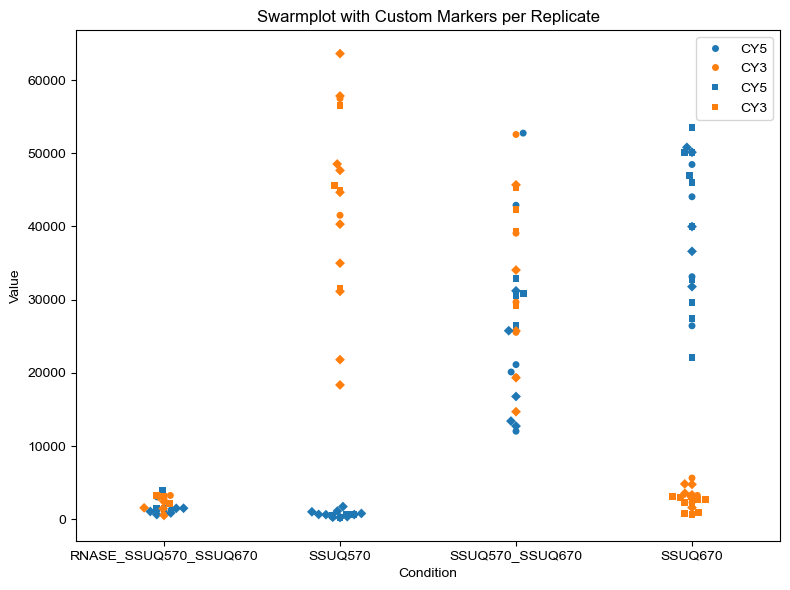

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom markers for reps
rep_markers = {
    'Rep1': 'o',
    'Rep2': 's',
    'Rep3': 'D',
    'Unknown': 'X'
}

# Initialize base plot
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot each replicate group manually
for rep, marker in rep_markers.items():
    subset = df[df['Rep'] == rep]
    sns.swarmplot(
        data=subset,
        x='Condition',
        y='Value',
        hue='Channel',  # or 'Channel' depending on what you want as hue
        marker=marker,
        ax=ax,
        dodge=False
    )

# Optional: fix legend and aesthetics
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:len(set(df['Condition']))], labels=labels[:len(set(df['Condition']))])
plt.title("Swarmplot with Custom Markers per Replicate")
plt.tight_layout()
plt.show()

In [179]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Arial'


In [180]:
df['FISH Probe'] = df.Channel.replace({'CY5': 'Q670','CY3':'Q570'})

In [181]:
df

File Channel  Value  \
0    D197198_RNASEASSUQ570SSUQ670_CY5, CY3, DAPI_3.tif     CY5   3071   
1    D197198_RNASEASSUQ570SSUQ670_CY5, CY3, DAPI_3.tif     CY3   2790   
3    D197198_RNASEASSUQ570SSUQ670_CY5, CY3, DAPI_4.tif     CY5   1263   
4    D197198_RNASEASSUQ570SSUQ670_CY5, CY3, DAPI_4.tif     CY3   1104   
6    D197198_RNASEASSUQ570SSUQ670_CY5, CY3, DAPI_5.tif     CY5   1286   
..                                                 ...     ...    ...   
172          D197198_SSUQ670_Rep3_CY5, CY3, DAPI_3.tif     CY3   3345   
174          D197198_SSUQ670_Rep3_CY5, CY3, DAPI_4.tif     CY5  50137   
175          D197198_SSUQ670_Rep3_CY5, CY3, DAPI_4.tif     CY3   3561   
177          D197198_SSUQ670_Rep3_CY5, CY3, DAPI_5.tif     CY5  39985   
178          D197198_SSUQ670_Rep3_CY5, CY3, DAPI_5.tif     CY3   1610   

                 Condition   Rep FISH Probe  
0    RNASE_SSUQ570_SSUQ670  Rep1       Q670  
1    RNASE_SSUQ570_SSUQ670  Rep1       Q570  
3    RNASE_SSUQ570_SSUQ670  Rep1       Q670  
4    RNASE_SSUQ570_SSUQ670  Rep1       Q570  
6    RNASE_SSUQ570_SSUQ670  Rep1       Q670  
..                     ...   ...        ...  
172                SSUQ670  Rep3       Q570  
174                SSUQ670  Rep3       Q670  
175                SSUQ670  Rep3       Q570  
177                SSUQ670  Rep3       Q670  
178                SSUQ670  Rep3       Q570  

[120 rows x 6 columns]

In [182]:
df['FOV counter']= df['Condition'] +'_'+ df['Rep']

In [183]:
df[df['Channel']=='CY5']['FOV counter'].value_counts()

FOV counter
SSUQ570_Rep3                  10
SSUQ670_Rep2                  10
RNASE_SSUQ570_SSUQ670_Rep3     5
SSUQ570_SSUQ670_Rep1           5
SSUQ570_SSUQ670_Rep3           5
SSUQ670_Rep3                   5
SSUQ570_Rep2                   4
SSUQ570_SSUQ670_Rep2           4
SSUQ670_Rep1                   4
RNASE_SSUQ570_SSUQ670_Rep1     3
RNASE_SSUQ570_SSUQ670_Rep2     3
SSUQ570_Rep1                   2
Name: count, dtype: int64

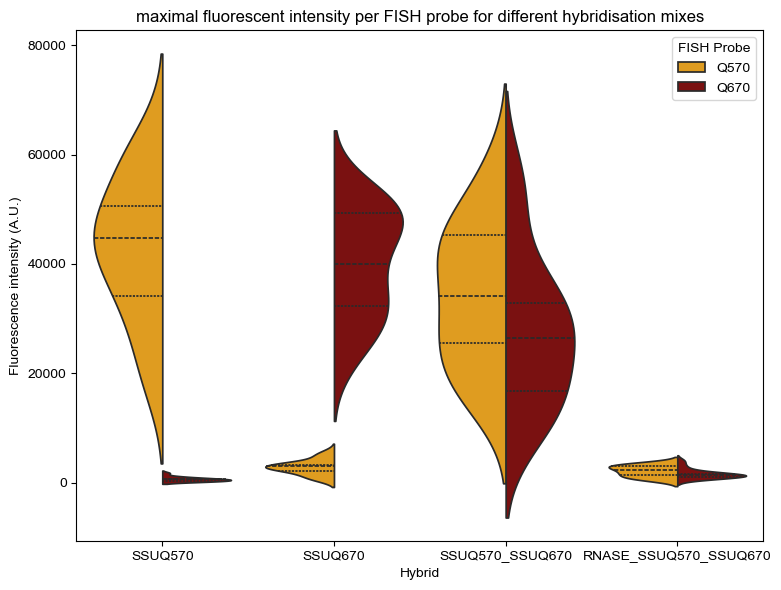

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot violin plot with 'Channel' as hue
ax=sns.violinplot(
    data=df,
    x='Condition',
    y='Value',
    hue='FISH Probe',
    hue_order=['Q570', 'Q670'],     # Splits violin into different sides
    ax=ax,
    split=True,        # Only works if hue has exactly 2 levels
    inner='quartile',  # Shows median and quartiles
    palette={'Q570': '#FFA500', 'Q670': '#8B0000'},
    density_norm='width',# Choose a suitable color palette
    order=['SSUQ570', 'SSUQ670', 'SSUQ570_SSUQ670','RNASE_SSUQ570_SSUQ670'],
)
ax.set_ylabel('Fluorescence intensity (A.U.)')
ax.set_xlabel('Hybrid')

# Optional: customize legend and aesthetics
plt.title("maximal fluorescent intensity per FISH probe for different hybridisation mixes")
plt.tight_layout()
#plt.show()

plt.savefig('max_fluorescent_intensity_violinplot.svg', dpi=600)

C:\Users\Sander\AppData\Local\Temp\ipykernel_8688\1452183051.py:23: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.stripplot(


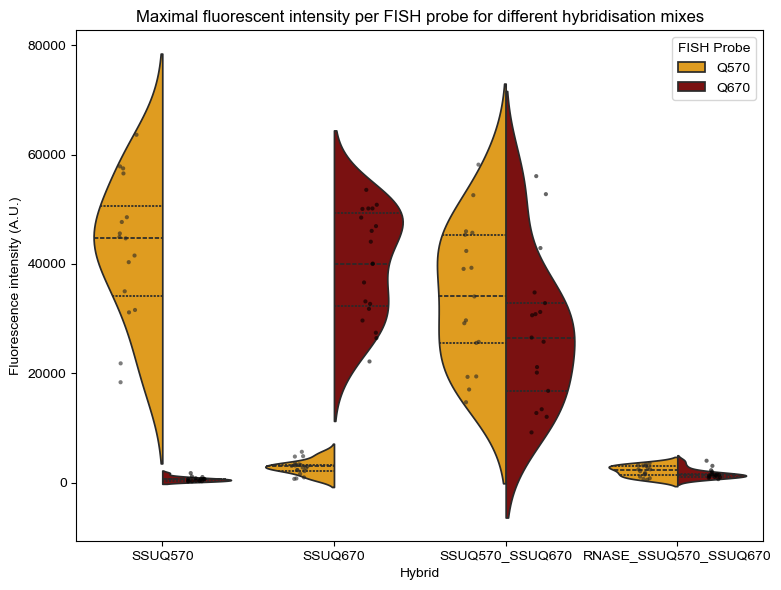

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = plt.gca()

# Violin plot
sns.violinplot(
    data=df,
    x='Condition',
    y='Value',
    hue='FISH Probe',
    hue_order=['Q570', 'Q670'],
    split=True,
    inner='quartile',
    palette={'Q570': '#FFA500', 'Q670': '#8B0000'},
    density_norm='width',
    order=['SSUQ570', 'SSUQ670', 'SSUQ570_SSUQ670', 'RNASE_SSUQ570_SSUQ670'],
    ax=ax
)

# Overlay scatter points (stripplot)
sns.stripplot(
    data=df,
    x='Condition',
    y='Value',
    hue='FISH Probe',
    hue_order=['Q570', 'Q670'],
    dodge=True,  # separate the hue categories within each Condition
    color='k',   # black points
    size=3,
    alpha=0.6,
    order=['SSUQ570', 'SSUQ670', 'SSUQ570_SSUQ670', 'RNASE_SSUQ570_SSUQ670'],
    ax=ax
)

# Remove duplicate legend from stripplot
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title='FISH Probe')

ax.set_ylabel('Fluorescence intensity (A.U.)')
ax.set_xlabel('Hybrid')
plt.title("Maximal fluorescent intensity per FISH probe for different hybridisation mixes")
plt.tight_layout()
plt.savefig('max_fluorescent_intensity_violinplot.svg', dpi=600)

In [ ]:
for file in file_max_values.keys():
    path = Path(file)
    savefolder = Path(path.parents[0],'Selected')
    savefolder.mkdir(parents=True, exist_ok=True)
    savefile = Path(savefolder, path.name)
    img = io.imread(path)
    io.imsave(savefile, img)

In [54]:
files = glob(r'E:\DATA\AMF\Olympus\250731_D197198_SSUQ5or670\*\Figure\*.tif')
names = ['RNASE_SSUQ570_SSUQ670', 'SSUQ570', 'SSUQ570_SSUQ670','SSUQ670']

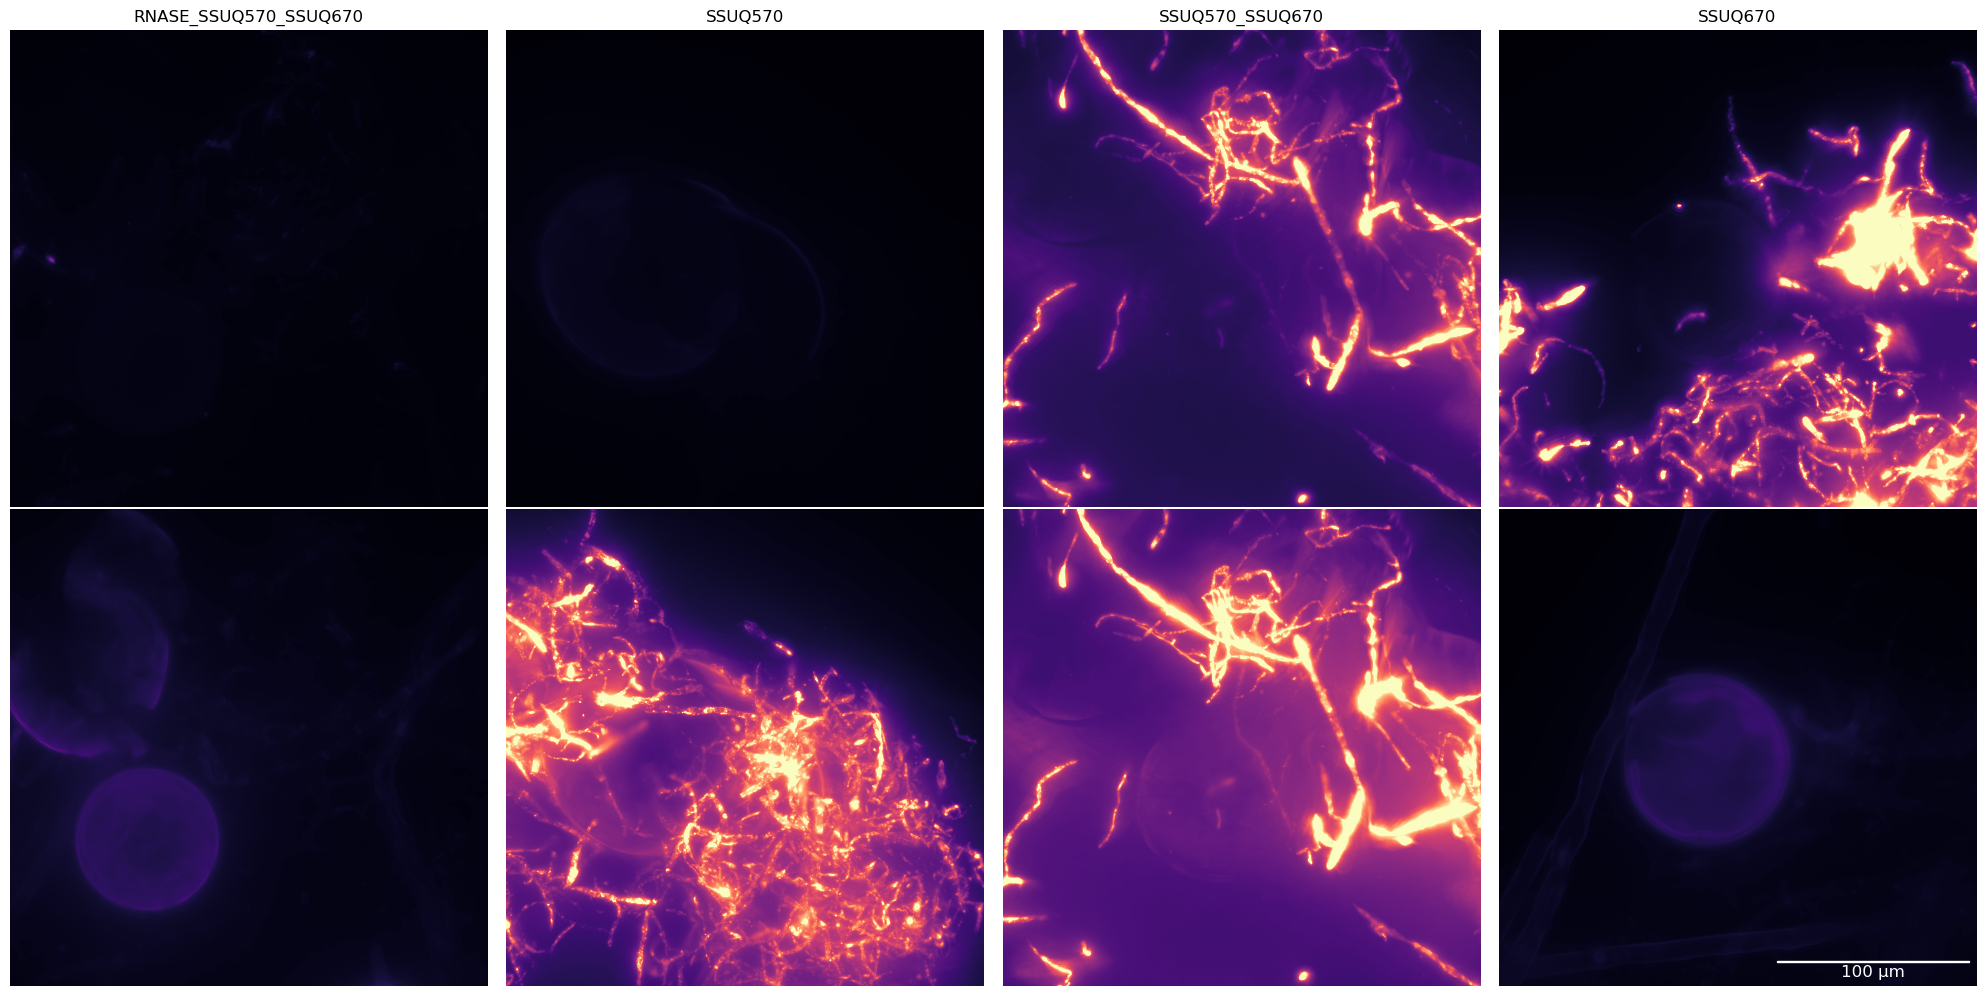

In [75]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
scalebar_length_um = 100  # length of scalebar in microns
pixel_size_um = 0.108
scalebar_length_px = scalebar_length_um / pixel_size_um 
fontprops = fm.FontProperties(size=12)

i=-1
for name,file in zip(names,files):
    i+=1
    channels = np.moveaxis(io.imread(file),-1,0)
    for j, channel in enumerate(channels):
        if j == 2:
            continue
        if j == 0:
            vmin, vmax = 0, 10000
            ax[j, i].set_title(name)
        elif j == 1:
            vmin, vmax = 0, 10000

        ax[j, i].axis('off')
        ax[j, i].imshow(channel, vmin=vmin, vmax=vmax, cmap='magma')

# Add scalebar to the bottom-left of each subplot
scalebar = AnchoredSizeBar(ax[1, 3].transData,
                           scalebar_length_px, f'{scalebar_length_um} µm',
                           'lower right', 
                           pad=0.3,
                           color='white',
                           frameon=False,
                           size_vertical=3,
                           fontproperties=fontprops)
ax[1, 3].add_artist(scalebar)
plt.tight_layout()

plt.savefig('probe_comparison.png',dpi=600)

In [106]:
# Desired order for names
desired_order = ['SSUQ570', 'SSUQ670', 'SSUQ570_SSUQ670', 'RNASE_SSUQ570_SSUQ670']

# Sort based on the index of name in desired_order
sorted_data = sorted(list(zip(names, files)), key=lambda x: desired_order.index(x[0]))

# Unzip if needed
names, files = zip(*sorted_data)

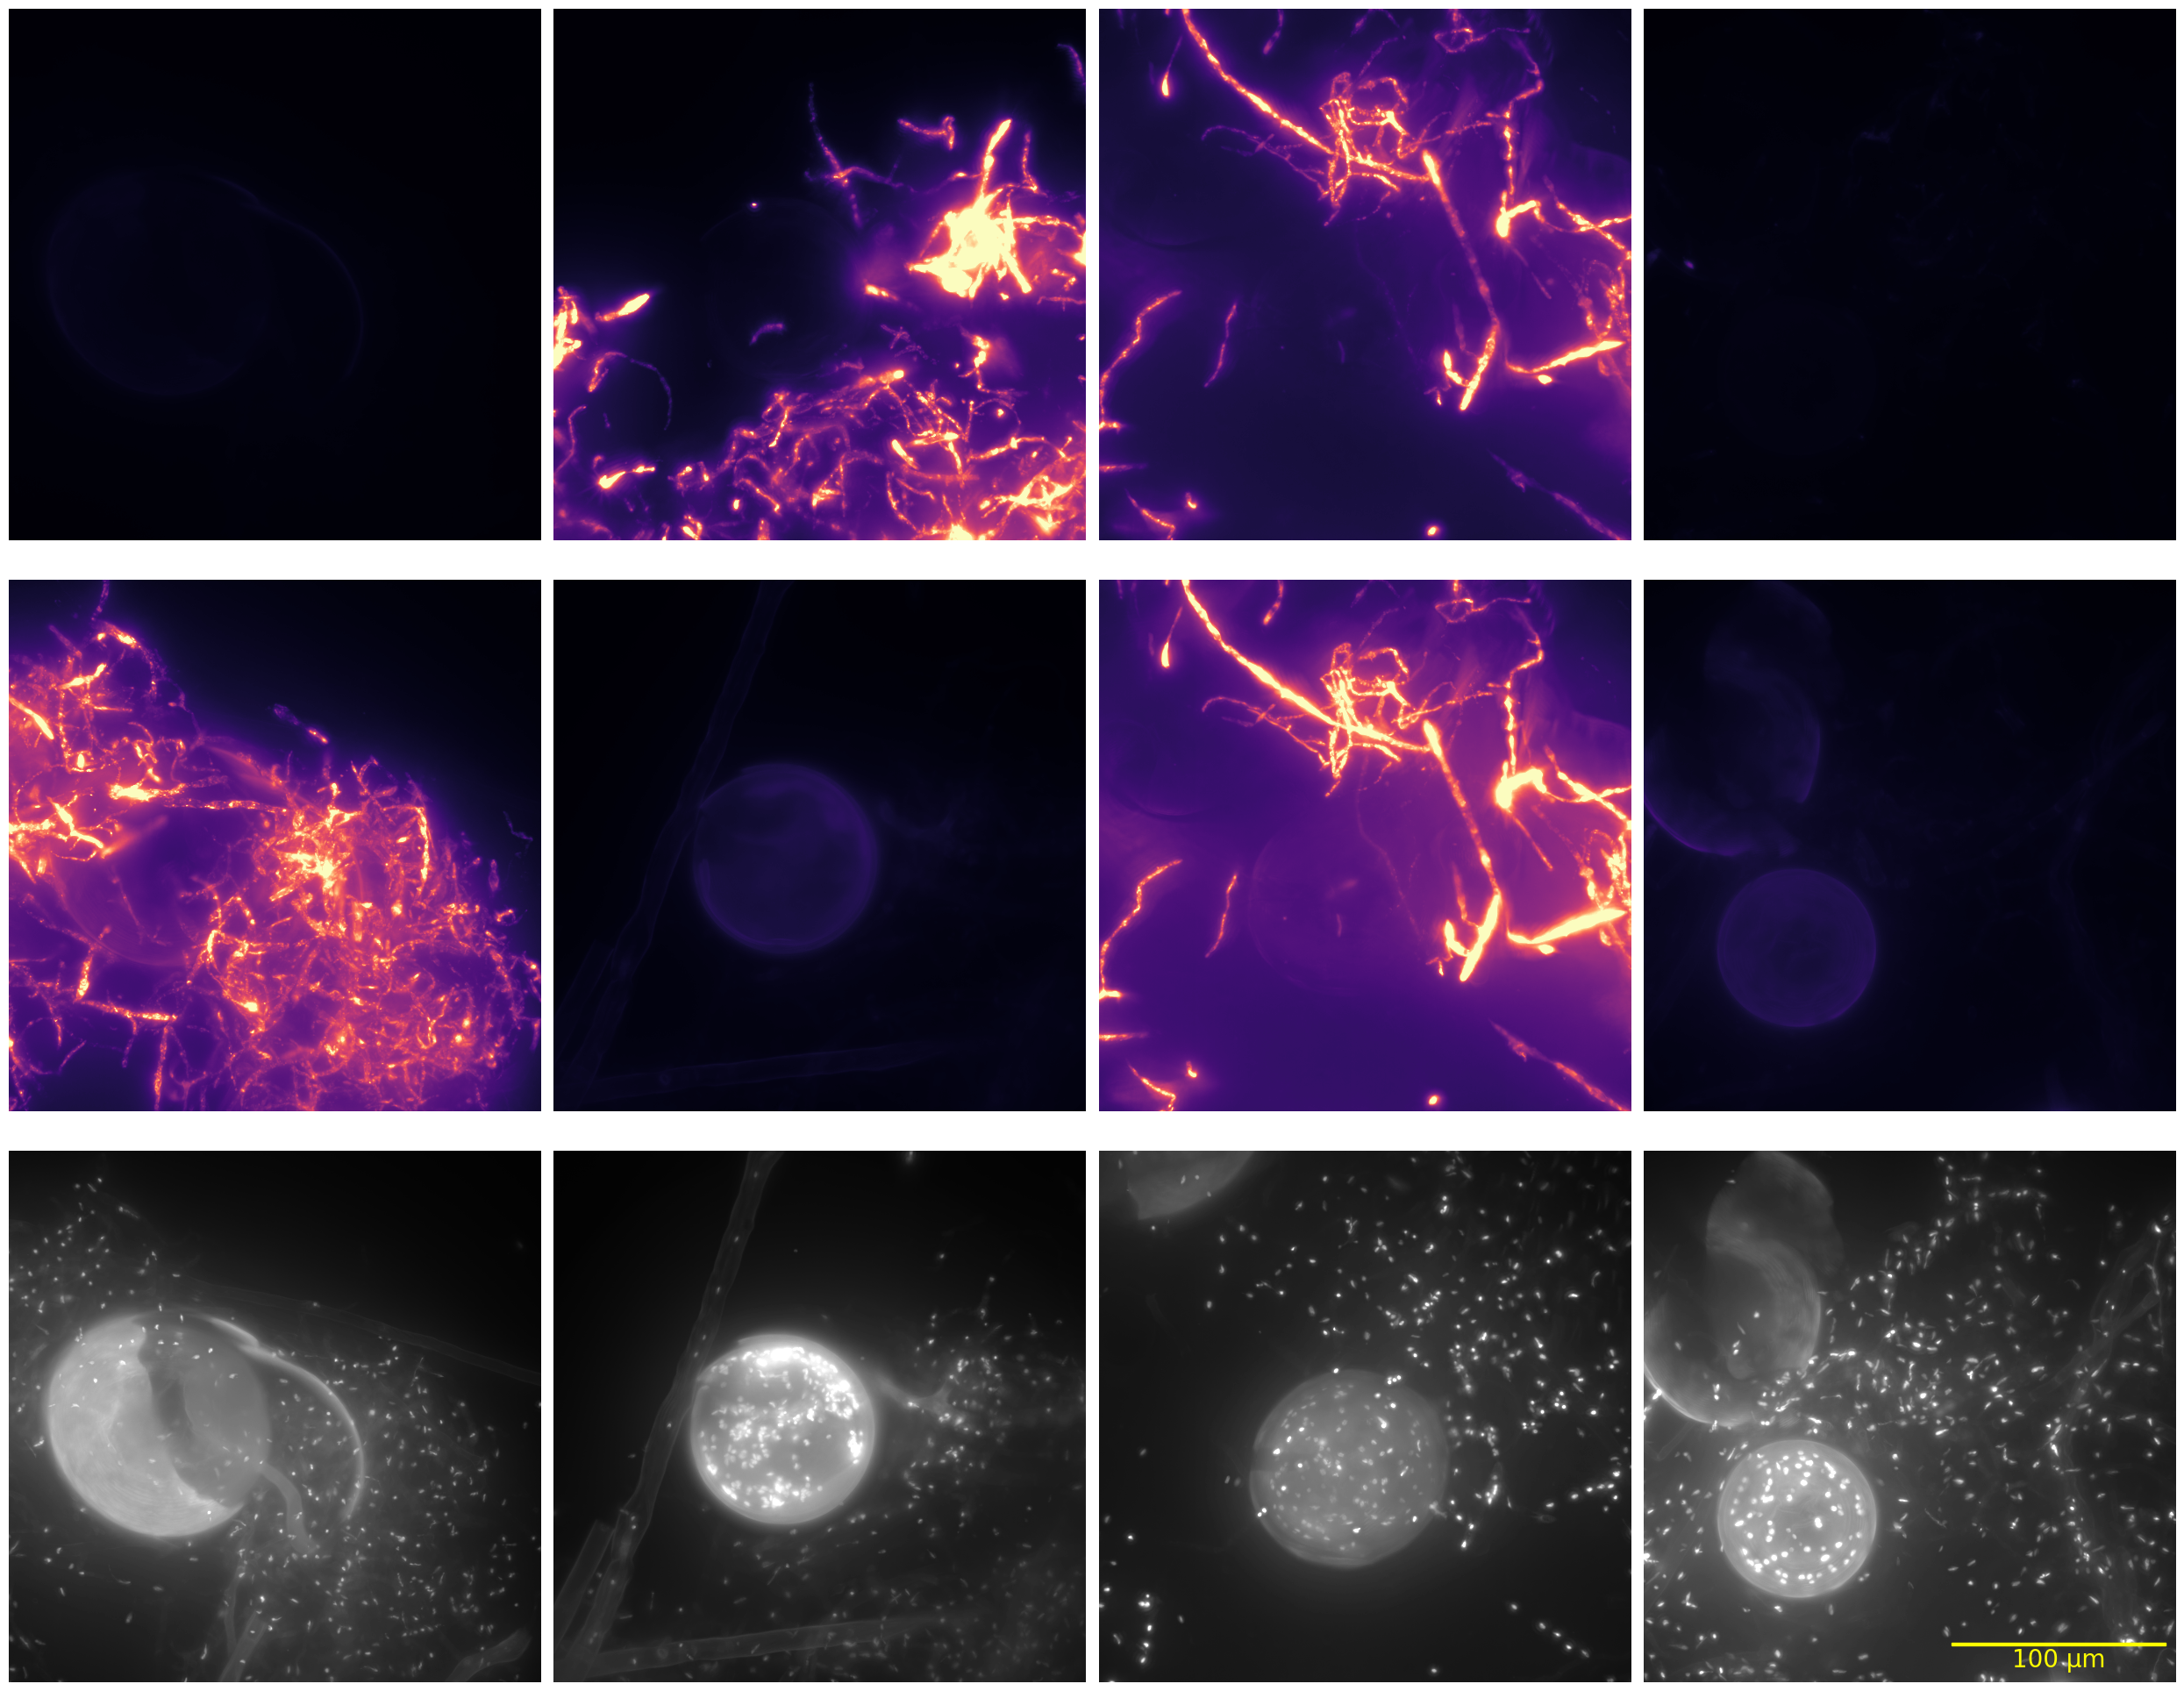

In [119]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25, 20))

scalebar_length_um = 100  # microns
pixel_size_um = 0.108
scalebar_length_px = scalebar_length_um / pixel_size_um 
fontprops = fm.FontProperties(size=20)

for i, (name, file) in enumerate(sorted_data):
    channels = np.moveaxis(io.imread(file), -1, 0)

    for j, channel in enumerate(channels):
        ax[j, i].axis('off')

        if j == 0:
            vmin, vmax = 0, 12000
            #ax[j, i].set_title(name)
            ax[j, i].imshow(channel, vmin=vmin, vmax=vmax, cmap='magma')

        elif j == 1:
            vmin, vmax = 0, 12000
            ax[j, i].imshow(channel, vmin=vmin, vmax=vmax, cmap='magma')

        elif j == 2:
            ax[j, i].imshow(channel, vmin=0, vmax=20000, cmap='gray')  # DAPI in blue

scalebar = AnchoredSizeBar(ax[1, 3].transData,
                           scalebar_length_px, f'{scalebar_length_um} µm',
                           'lower right', 
                           pad=0.3,
                           color='yellow',
                           frameon=False,
                           size_vertical=10,
                           fontproperties=fontprops)
ax[2, 3].add_artist(scalebar)
plt.tight_layout()
plt.savefig('probe_comparison.svg',dpi=600)